# Local resolution estimation with the one-image FRC

This notebook shows how Quoll's tools can be used to calculate the one-image FRC. The one-image FRC measure implemented here is a modification of [miplib](https://github.com/sakoho81/miplib). The one-image FRC calculation is calibrated to match the gold standard two-image FRC using a calibration function, which is derived here for EM images. The original `miplib` calibration function was calculated for fluorescence microscopy.

In [17]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))

from quoll.io import reader
from quoll.frc import oneimg

## Choose an image to load

Load an image as a Quoll Image object, this contains the attributes needed to calculate FRC and other image quality measures.

In [11]:
QuollImg = reader.Image(
    filename="../data/SerialFIB57_2048x2048.tif",
    pixel_size=3.3724,
    unit="nm"
)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


A Quoll Image object contains the following attributes
- `filename`
- `pixel_size`: size of each pixel in physical units
- `unit`: unit of measurement for pixel size
- `tiles`: a dictionary, where the keys are the path to each tile and the values are the tile as an array
- `img_data`: image as an array
- `img_dims`: dimensions of the image in (z,x,y)
- `img_bitdepth`: bit depth of the image.

Any of the Quoll Image attributes can be called using the following cell

In [12]:
# Just change out the attribute you want to retrieve
QuollImg.pixel_size

3.3724

The image can also be displayed with the `Image.show` method

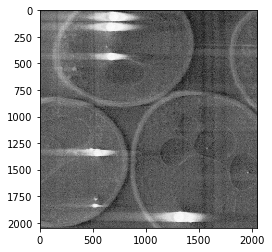

In [13]:
QuollImg.show()

## Calculating local FRC

The function `oneimg.calc_local_frc` returns a Pandas DataFrame of the local resolution of each patch of an image.

This function requires the following inputs:
- `Image`: a Quoll Image object
- `tile_size`: length of one side of the square tile in pixels. This must be above 100. A good default is usually 256.
- `tiles_dir`: path to the directory where you will save the tiles.

In [14]:
results_df = oneimg.calc_local_frc(
    Image=QuollImg,
    tile_size=256,
    tiles_dir="./test_tiles_dir"
)

results_df

c:\Users\dmv31621\Miniconda3\envs\quoll\lib\site-packages\pims\bioformats.py:53: UserWarning: loci_tools.jar not found, downloading
  warn('loci_tools.jar not found, downloading')
c:\Users\dmv31621\Miniconda3\envs\quoll\lib\site-packages\jpype\_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
c:\Users\dmv31621\Miniconda3\envs\quoll\lib\site-packages\pims\bioformats.py:386: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  w

,Resolution
000.tif,17.824817
001.tif,23.816892
002.tif,16.999376
003.tif,18.301705
004.tif,18.487262
...,...
059.tif,18.302201
060.tif,18.725058
061.tif,17.419384
062.tif,19.555825


We can now make use of the resolutions data. One example is to just describe the distributions.

In [15]:
results_df.describe()

,Resolution
count,64.000000
mean,18.949491
std,1.934696
min,14.690358
25%,17.579421
50%,18.753015
75%,20.028791
max,24.423028


We can also plot the resolutions

Text(0, 0.5, 'Number of patches')

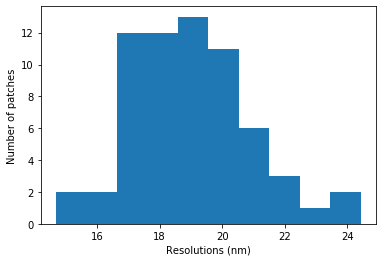

In [19]:
plt.hist(results_df.Resolution)
plt.xlabel("Resolutions (nm)")
plt.ylabel("Number of patches")

Or plot a heatmap of the resolutions

## to implement